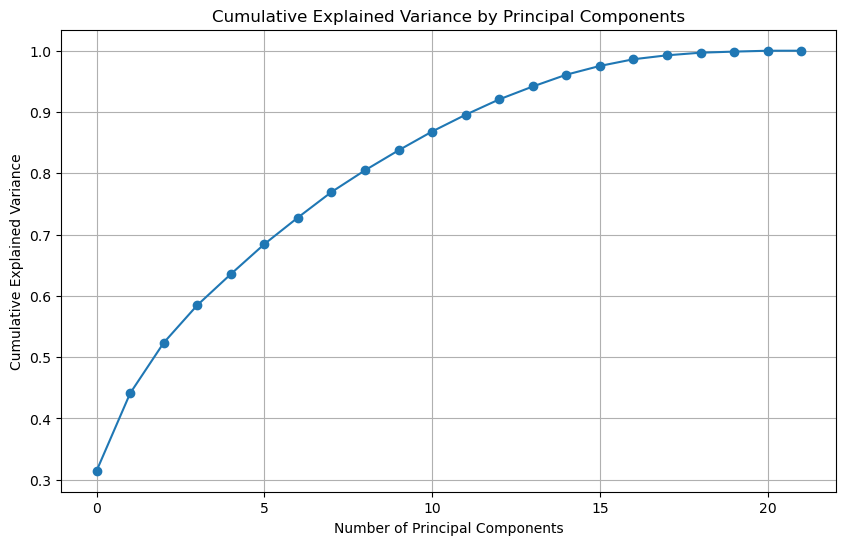

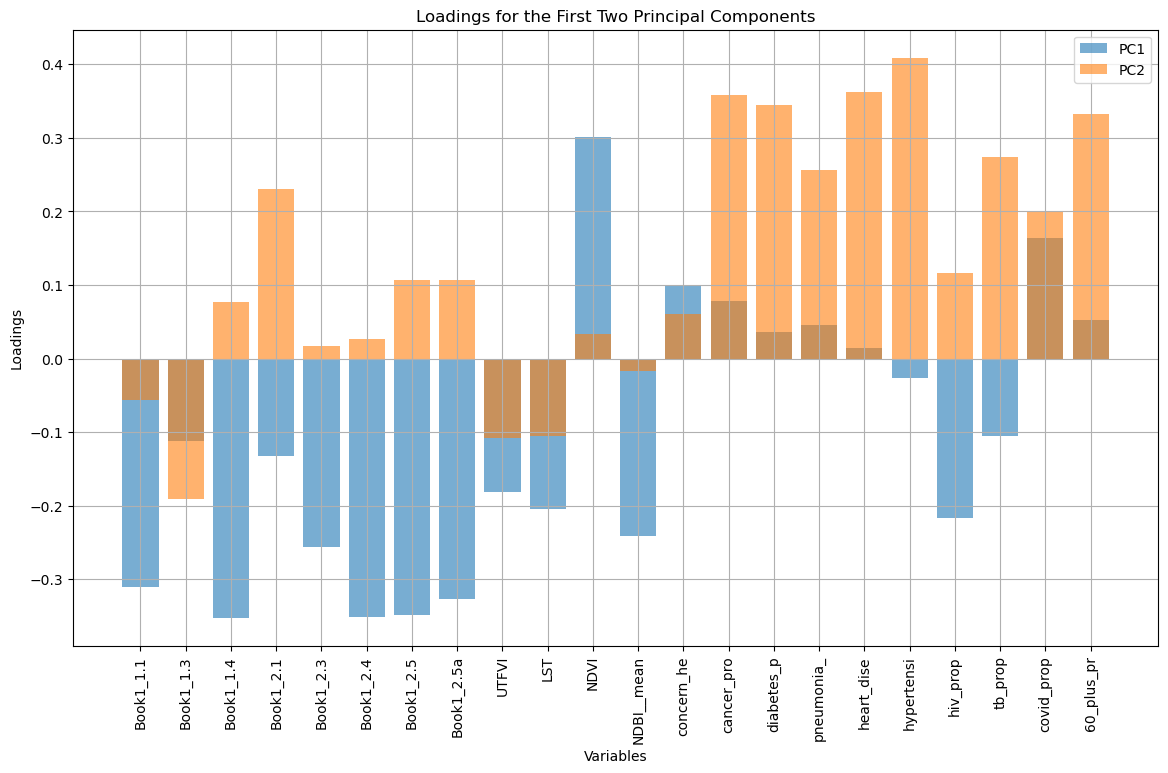

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'IBM_analyis_csv.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of all variables to include in PCA
variables = [
    'Book1_1.1', 'Book1_1.3', 'Book1_1.4', 'Book1_2.1', 'Book1_2.3', 
    'Book1_2.4', 'Book1_2.5', 'Book1_2.5a', 'UTFVI', 'LST', 'NDVI', 
    'NDBI__mean', 'concern_he', 'cancer_pro', 'diabetes_p', 'pneumonia_',
    'heart_dise', 'hypertensi', 'hiv_prop', 'tb_prop', 'covid_prop', '60_plus_pr'
]

# Filter the dataframe to include only the selected variables
df_selected = df[variables]

# Rescale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Perform PCA
pca = PCA(n_components=None)  # Retain all components
principal_components = pca.fit_transform(scaled_data)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Get the loadings (coefficients of the original variables)
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=variables)

# Visualize the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Visualize the loadings for the first two principal components
plt.figure(figsize=(14, 8))
plt.bar(x=variables, height=loadings_df.iloc[0], label='PC1', alpha=0.6)
plt.bar(x=variables, height=loadings_df.iloc[1], label='PC2', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Loadings for the First Two Principal Components')
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Save the loadings to a CSV for further analysis
loadings_df.to_csv('PCA_Loadings.csv', index=False)


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
file_path = 'IBM_analyis_csv.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of all variables to include in PCA
variables = [
    'Book1_1.1', 'Book1_1.3', 'Book1_1.4', 'Book1_2.1', 'Book1_2.3', 
    'Book1_2.4', 'Book1_2.5', 'Book1_2.5a', 'UTFVI', 'LST', 'NDVI', 
    'NDBI__mean', 'concern_he', 'cancer_pro', 'diabetes_p', 'pneumonia_',
    'heart_dise', 'hypertensi', 'hiv_prop', 'tb_prop', 'covid_prop', '60_plus_pr'
]

# Filter the dataframe to include only the selected variables
df_selected = df[variables]

# Rescale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Perform PCA
pca = PCA(n_components=None)  # Retain all components
principal_components = pca.fit_transform(scaled_data)

# Option 1: Use the first principal component as the HVI
df['HVI_PC1'] = principal_components[:, 0]

# Option 2: Create a weighted combination of the first few principal components
# For example, using the first 3 components
weights = pca.explained_variance_ratio_[:3]
df['HVI_weighted'] = np.dot(principal_components[:, :3], weights)

# Optional: Standardize the HVI (rescale to 0-1)
df['HVI_PC1_standardized'] = (df['HVI_PC1'] - df['HVI_PC1'].min()) / (df['HVI_PC1'].max() - df['HVI_PC1'].min())
df['HVI_weighted_standardized'] = (df['HVI_weighted'] - df['HVI_weighted'].min()) / (df['HVI_weighted'].max() - df['HVI_weighted'].min())

# Save the results to a CSV file
df.to_csv('Ward_HVI.csv', index=False)

# Display the first few rows of the resulting dataframe
df[['HVI_PC1', 'HVI_weighted', 'HVI_PC1_standardized', 'HVI_weighted_standardized']].head()


,HVI_PC1,HVI_weighted,HVI_PC1_standardized,HVI_weighted_standardized
0,-1.067589,-0.062038,0.333000,0.439167
1,-2.569988,-0.761631,0.183269,0.248833
2,-3.174382,-0.889217,0.123035,0.214121
3,-1.646309,-0.480644,0.275324,0.325279
4,-1.198829,-0.403393,0.319920,0.346297


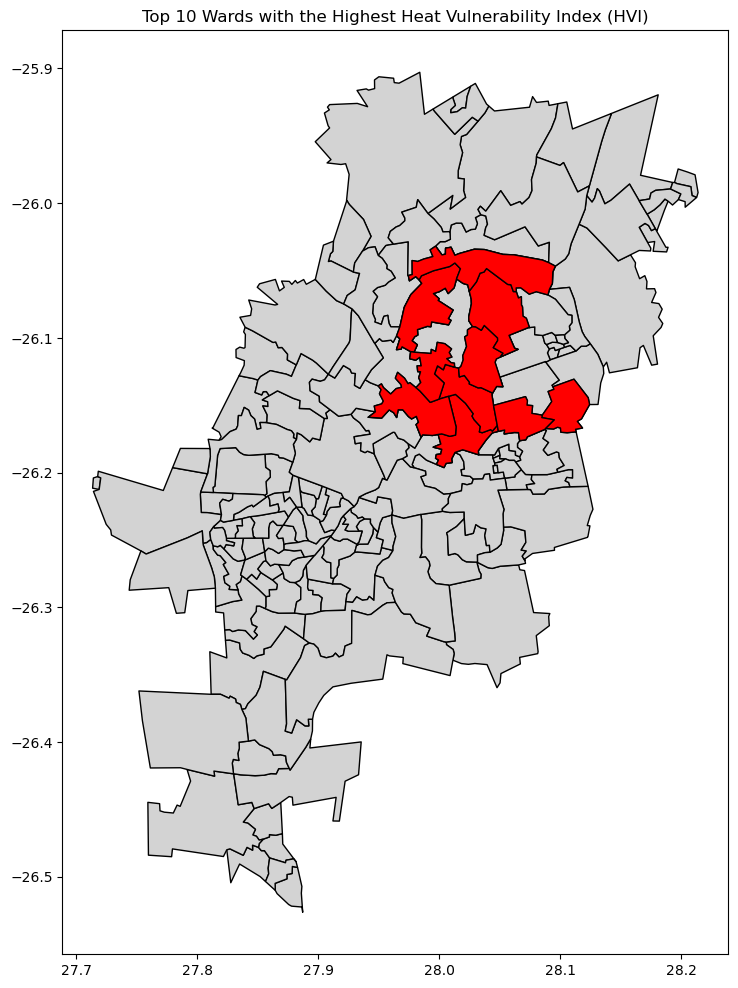

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file directly using GeoPandas
file_path = 'HVI_included.geojson'

# Load the file with geopandas
gdf = gpd.read_file(file_path)

# Explode multi-part geometries into single-part geometries
gdf = gdf.explode(index_parts=False)

# Sort by the standardized HVI (using HVI_PC1_standardized in this example)
gdf_sorted = gdf.sort_values(by='Ward_HVI_1_HVI_PC1_standardized', ascending=False)

# Optionally, select top 10 wards with the highest HVI
top_wards = gdf_sorted.head(10)

# Plot the entire ward map
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay the top wards with the highest HVI
top_wards.plot(ax=ax, color='red', edgecolor='black')

# Add a title and show the plot
plt.title('Top 10 Wards with the Highest Heat Vulnerability Index (HVI)')
plt.show()


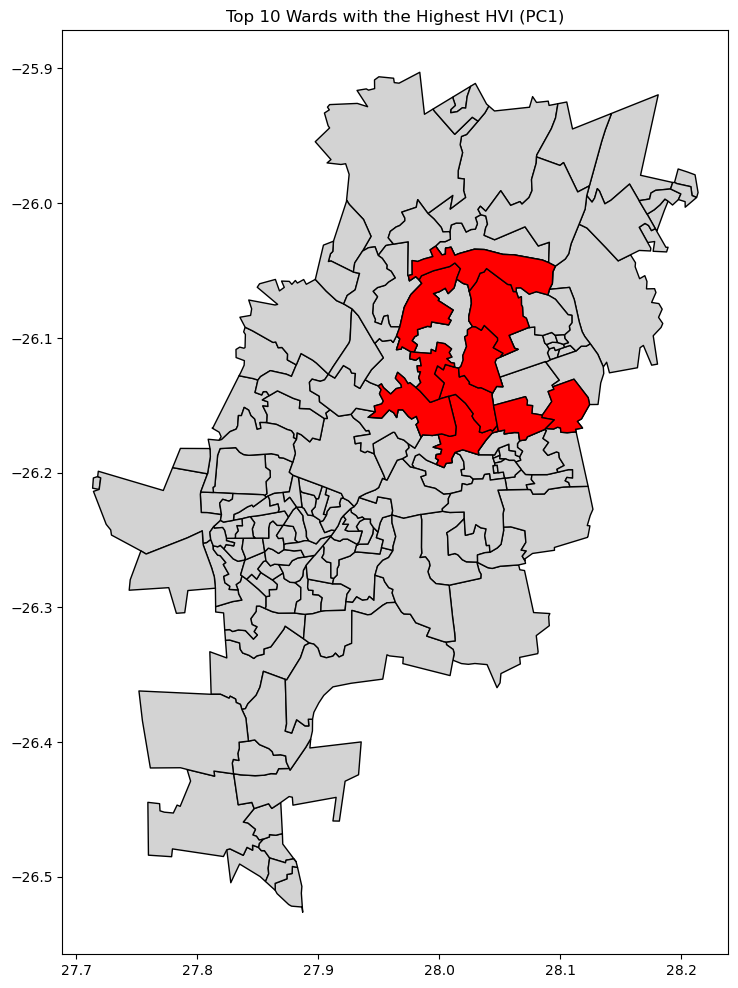

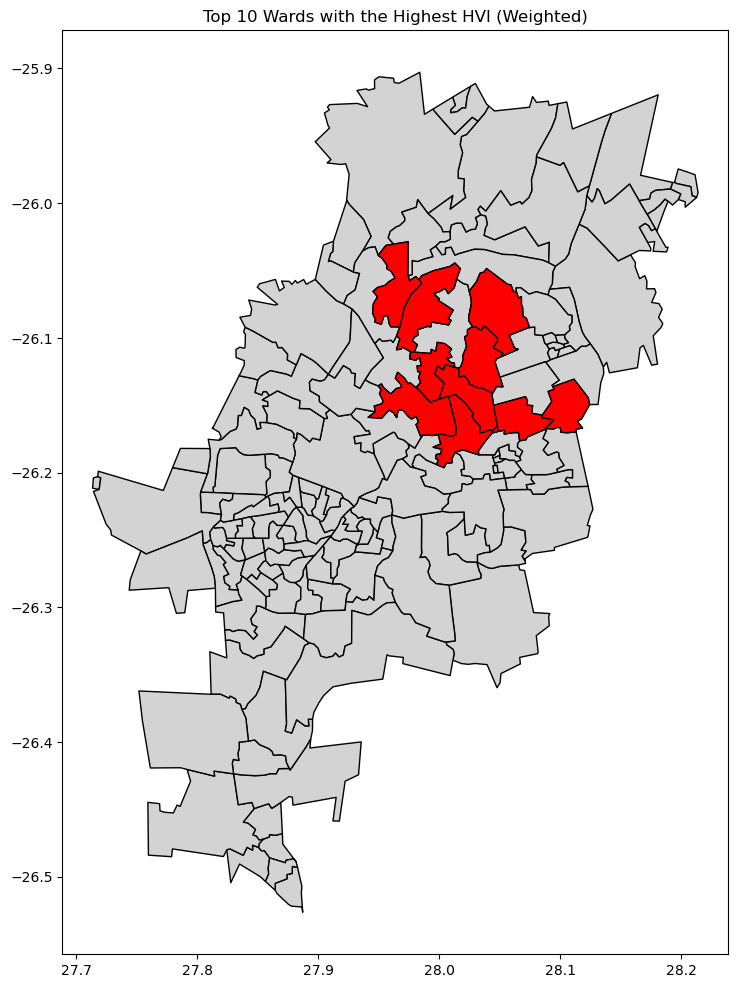

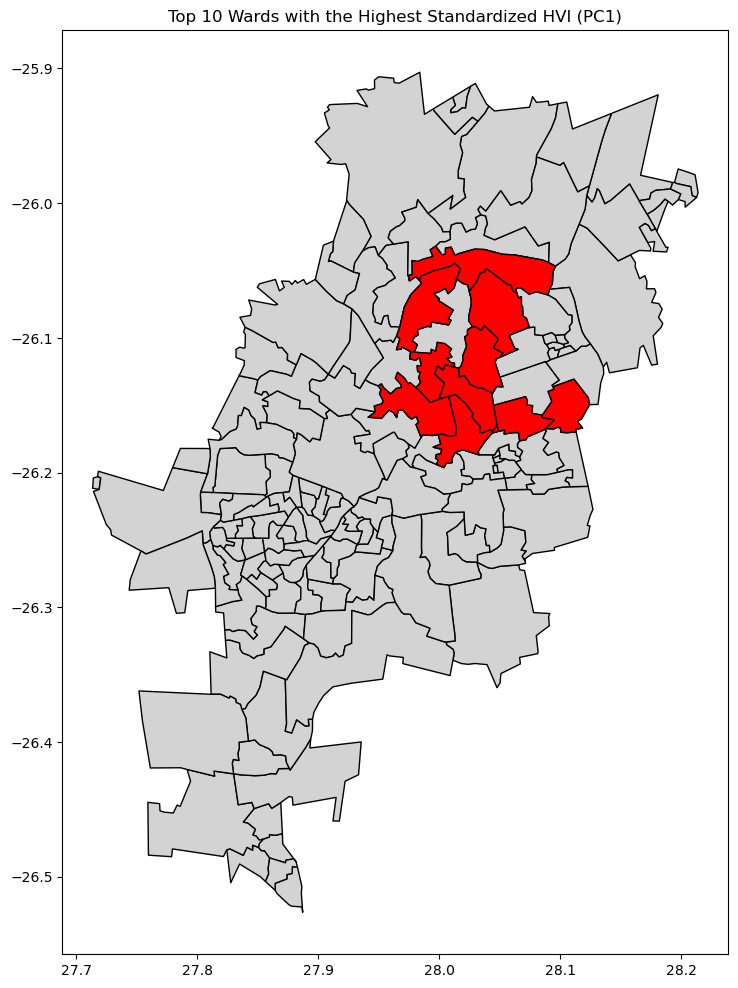

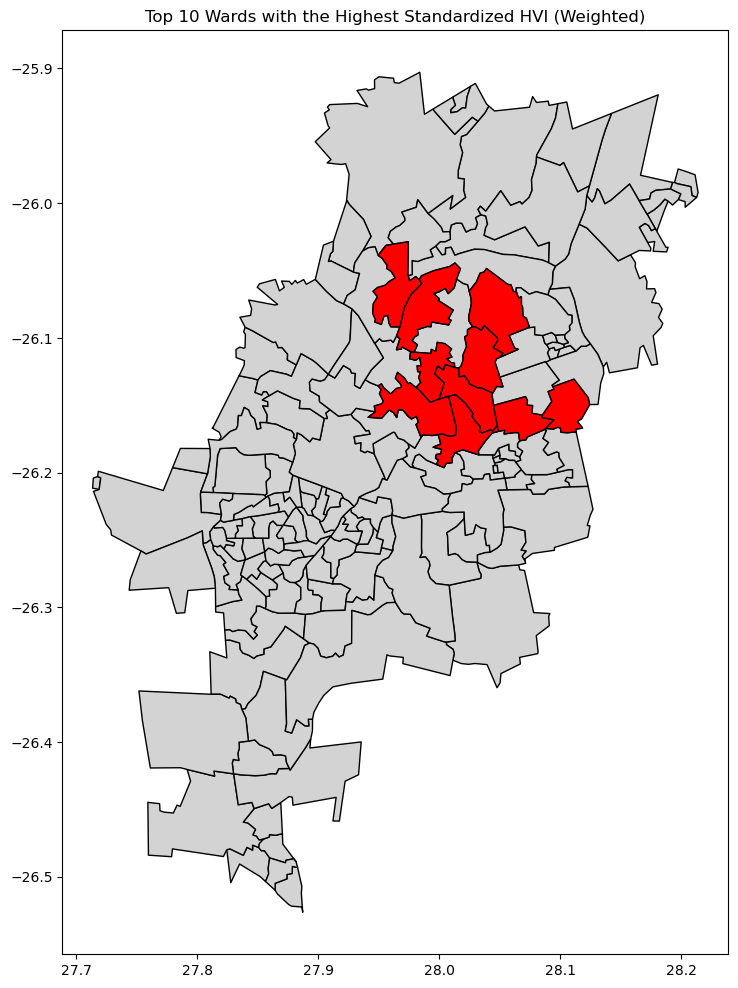

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file directly using GeoPandas
file_path = 'HVI_included.geojson'
gdf = gpd.read_file(file_path)

# Explode multi-part geometries into single-part geometries
gdf = gdf.explode(index_parts=False)

# Define a function to plot the top 10 wards for a given column
def plot_top_10(column_name, title):
    gdf_sorted = gdf.sort_values(by=column_name, ascending=False)
    top_wards = gdf_sorted.head(10)
    
    fig, ax = plt.subplots(figsize=(12, 12))
    gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
    top_wards.plot(ax=ax, color='red', edgecolor='black')
    plt.title(title)
    plt.show()

# Plot top 10 maps for each of the specified columns
plot_top_10('Ward_HVI_1_HVI_PC1', 'Top 10 Wards with the Highest HVI (PC1)')
plot_top_10('Ward_HVI_1_HVI_weighted', 'Top 10 Wards with the Highest HVI (Weighted)')
plot_top_10('Ward_HVI_1_HVI_PC1_standardized', 'Top 10 Wards with the Highest Standardized HVI (PC1)')
plot_top_10('Ward_HVI_1_HVI_weighted_standardized', 'Top 10 Wards with the Highest Standardized HVI (Weighted)')



In [11]:
import geopandas as gpd

# Load the GeoJSON file
file_path = 'HVI_included.geojson'
gdf = gpd.read_file(file_path)

# Handle multi-part geometries by exploding them into single-part geometries
gdf = gdf.explode(index_parts=False)

# Define a function to create new layers for the top 10 wards
def create_top_10_layer(column_name, output_file):
    gdf_sorted = gdf.sort_values(by=column_name, ascending=False)
    top_wards = gdf_sorted.head(10)
    top_wards.to_file(output_file, driver='GeoJSON')

# Create new layers for each HVI column
create_top_10_layer('Ward_HVI_1_HVI_PC1', 'top_10_HVI_PC1.geojson')
create_top_10_layer('Ward_HVI_1_HVI_weighted', 'top_10_HVI_weighted.geojson')
create_top_10_layer('Ward_HVI_1_HVI_PC1_standardized', 'top_10_HVI_PC1_standardized.geojson')
create_top_10_layer('Ward_HVI_1_HVI_weighted_standardized', 'top_10_HVI_weighted_standardized.geojson')

